<a href="https://colab.research.google.com/github/dbsdlsdud/AIStudy24/blob/master/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC쇼핑몰에서 럭키백을 판매하기로 했다.
* 럭키백에는 생선이 들어있다. 종류 : 7가지(랜덤)
* 럭키백에 확률 표시 : 들어있는 7가지 생선의 확률필요

1. 럭키백 확률 : 생선 7마리
2. 생선의 크기 (길이, 높이, 두께, 대각선의 길이, 무게)

In [1]:
# k-최근접 알고리즘 - 회귀 ?, 분류 ? : 확률을 알고 싶은 것이기 때문에 회귀를 사용
# 샘플 10개 중 농어가 3개면 3/10 = 0.3 + 빙어가 5개면 5/10 = 0.5 + 도미가 2개면 2/10 = 0.2 = 100%
# 사이킷런의 k-최근접 이웃 분리기도 동일한 방식으로 확률계산도 해준다.

# 로지스틱회귀 : 럭키백 확률
# 샘플데이터 준비
import pandas as pd # 판다스로 csv가져오기
fish = pd.read_csv('https://bit.ly/fish_csv_data') # 웹에 있는 파일 가져오기
fish.head() # 제일 윗쪽 데이터 5개 보여줌
# 종류, 무게, 길이, 대각선, 높이, 두께

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species'])) # 유니크하게 종류 출력(유일한 값 출력)

# 7개의 어종이 분포되어 있다. Bream : 도미, Roach : 대구, Whitefish : 잉어
# Raekki : 붕어, Rerch : 농어, Pike : 가물치, Smalt : 빙어

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# 분석용 입력값 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# 원하는 필드를 넣어 필터링
print(fish_input[:5]) # 앞에서  부터 5개 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy()
# fish[['Species']]라고 적으면 2차원 배열이 된다
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [10]:
from sklearn.model_selection import train_test_split
# 훈령용, 테스트용 나누기
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
# 훈련용 : 119개의 5개 특성, 테스트용 : 40개의 5개 특성
print(train_input.shape, test_input.shape)

(119, 5) (40, 5)


In [31]:
from sklearn.preprocessing import StandardScaler # 사이킷런의 전처리용(스케일조정) / 표준점수화

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:3])
print(test_scaled[:3])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]]
[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]]


In [55]:
from sklearn.neighbors import KNeighborsClassifier # 분류용

kn = KNeighborsClassifier(n_neighbors=3) # 이웃 3개 참고
kn.fit(train_scaled, train_target) # 훈련 시작

KNeighborsClassifier(n_neighbors=3)

In [56]:
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [14]:
# 전에는 0과 1을 찾는 이진분류였지만 지금은 타겟에 7개의 어종을 넣었다.
print(kn.classes_) # 2개이상 클래스가 포함된 문제를 다중 분류라고 한다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [15]:
print(kn.predict(test_scaled[:5])) # 처음 5개 샘플을 타깃값 예측

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [16]:
print(test_scaled[:5]) # 확률값 출력
# ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch'] 순서

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [20]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
# 사이킷런이 번거로운 연산을 수행해줌으로 쉽게 결과가 나온다.
print(np.round(proba, decimals=4))
# (소수점 표시)decimals = 4: 네번째 자리까지 표시하고 다섯번째에서 반올림
# ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 순서

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [21]:
# ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch'] 결과를 확인할 수 있다.

# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인이 필요함
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 4번째 값 확인
#                                            Perch 2/3      Roach 1/3
print(train_target[indexes]) # [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# Perch 2/3, Roach 1/3 이기 때문에 7개를 확률로 제공하지 못한다.
# 이유 : n_neighbors = 3 으로 했기 때문

[['Roach' 'Perch' 'Perch']]


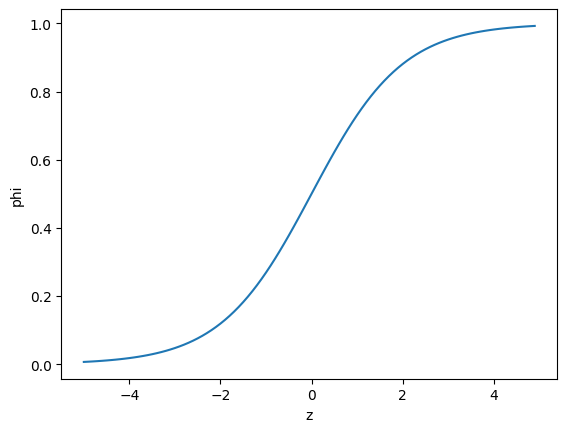

In [22]:
# 알고리즘 변경 : 로지스틱 회구l(LogisiticRegression)
# 로지스틱 회귀는 사이킷런에서 제공한다. (이름이 회귀지만 분류모델이다)
# 선형회귀와 동일하게 선형방정식을 학습한다.
# z = a * (Weight) + b * (Length) + c * ( Diagonal) + d * (Height) + e * ( Width) + f
# a, b, c, d, e, f는 각 항복에 대한 가중치(중요도, 계수)
# z는 어떤 값도 가능하지만 확률이 되려면 0~1(0%~100%)사이값
# z가 아주 큰 음수일때 0, 아주 큰 양수일때 1이 되도록 바꾸는 방법은 시그모이드 함수, 로지스틱함수
import numpy as np
import matplotlib.pyplot as plt
# 시그모이드 함수용 : z가 무한하게 큰 음수일 경우 0에 가까워지고 z가 무한하게 큰 양수일 경우 1에 가까워진다.
z = np.arange(-5, 5, 0.1) # -5~5까지 0.1간격으로 배열 생성
phi = 1 / (1 + np.exp(-z)) # np.exp() 함수로 시그모이드 적용
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()
# 선형방정식 출력 z의 음수를 사용해서 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취한다.
# 0~1사이 값을 0~100% 확률로 해석할 수 있다.

In [26]:
# 훈련전에 이진분류 알아보기
# 이진분류인 경우 시그모이드 함수 출력이 0.5보다 크면 양성, 0.5보다 작으면 음성으로 판단
# 단 0.5가 나오면 라이브러리마다 다르지만 사이킷런은 음성으로 판단함

# 로지스틱회귀로 이진분류 수행 테스트
# 넘파이 배열은 True, False값을 전달하여 행 선택이 가능하다.(불리언 인덱싱)
char_arr = np.array(["A", "B", "C", "D", "E"])
print(char_arr[[True, False, True, False, False]]) # 불리언 인덱싱 (True인 것만 나옴)

# 위와 같은 방식으로 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

# bream_smelt_indexes에 도미와 빙어일 경우 True 나머지는 False
# 이 배열을 사용해서 train_scaled, train_tatget 배열에 인덱싱을 적용하면
# 손쉽게 도미와 빙어 데이터만 골라낼 수 있다.
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

['A' 'C']


In [27]:
# 사이킷런 선형모델에 로지스틱 회귀 클래스 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # 로지스틱 회귀 객체 변수에 연결
lr.fit(train_bream_smelt, target_bream_smelt) # 훈련 시작 -> 이진분류로 나옴

LogisticRegression()

In [28]:
# train_bream_smelt에 처음 5개 값에 대한 결론
print(lr.predict(train_bream_smelt[:5])) # 도미 4개, 빙어 1개

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [33]:
print(lr.predict_proba(train_bream_smelt[:5])) # 확률 확인
# 시그모이드 함수 : 샘플마다 2개의 확률 출력
# 첫번째 열이 0(음성)에 대한 확률, 두번째 열이 1(양성)에 대한 확률
# 사이킷런의 타깃값은 알파벳 순으로 정렬해서 사용한다.
print(lr.classes_) # Smelt(빙아) : 양성
# 두번째 샘플만 양성 클래스인 빙어의 확률이 높다.(나머지 도미로 예측)
# 만약 도미(Bream)를 양성 클래스로 사용하고 싶으면 전처리에서 Bream인 타깃값을 1로 만들면 된다.

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
['Bream' 'Smelt']


In [39]:
# 로지스틱 회귀로 학습한 계수(중요도) 알아보기
print(lr.coef_, lr.intercept_)
# 선형 방정식에 대입해서 결과가 나온다.
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# z = -0.40451732 * (Weight) + -0.57582787 * (Length) + -0.66248158 * (Diagonal)
# -1.01329614 * (Height) +  -0.73123131 * (Width) + -2.16172774 로 가중치 결정

decisions = lr.decision_function(train_bream_smelt[:5])
# train_bream_smelt의 처음 5개 z값 출력
print('z 점수',decisions)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [41]:
# z값을 시그모이드 함수에 통과 시키면 확률을 얻을 수 있다.
# 파이썬의 사이파이(scipy) 라이브러리에서도 시그모이드 함수가 있다 -> expit()
from scipy.special import expit
print(expit(decisions)) # phi = 1/ 1(+np.exp(-z))
# 여기까지가 3개의 물고기를 분류하는 방법
# [도미, 빙어, 도미, 도미, 도미] 순서

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [42]:
# 다중분류 (이진분류는 True아니면 모두 False처리 된다.)
# 현재 어종 7개를 로지스틱 회귀로 분류 학습하기
# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용하고 (max_iter 기본값 100) 릿지 회귀와 같은 계수를 제곱을 규제한다(L2 규제)
# 릿지 회귀에서는 alpha매개변수로 규제 양을 조절했다 -> alpha가 크면 규제도 커진다
# 로지스틱 회귀에서는 규제를 제어하는 매개변수가 C로 되어있다 -> C가 작으면 규제가 커진다(기본 1) 규제를 완화하기 위해 20으로 향상
# max_iter 반복횟수를 100으로 하면 부족하다라는 경고 문구가 나와 1000으로 향상

lr = LogisticRegression(C=20, max_iter=1000) # max_iter = 1000 정확도를 위해 1000번 반복
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target)) # 과소나 과대적합이 아닌듯함

0.9327731092436975
0.925


In [44]:
print(lr.predict(test_scaled[:5])) # 결과 분석시 다중분류로 나옴

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [46]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
# ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 순서
print(lr.classes_) # 알파벳 순으로 정렬 / 7개의 클래스 명확하게 구분

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [47]:
# 다중 분류일때 선형방정식
print(lr.coef_.shape, lr.intercept_.shape)
# (7, 5) : 7개의 행, 5개의 특성
# (7, ) : 7개의 행 -> 이진 분류에서 보았던 z를 7개를 계산
# 다중 분류는 클래스마다 z값을 하나씩 계산한다는 의미다.
# 당연히 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.
# 확률 ? :
# 이진분류에서는 시그모이드 함수를 사용해 z를 0과 1사이 값으로 변환했다.
# 다중분류에서 소프트맥스 함수를 사용해 7개의 z값을 확률로 변환한다.
# 소프트맥스 계산법
# e_sum = e^z1 + e^z2 + e^z3 +e^z4 + e^z5 + e^z6 + e^z7
# s1 = e^z1 / e_sum ...... s7 = e^z7 / e_sum -> s1 ~ s7 까지 모두 더하면 분모가 같아져서 1이 된다.

(7, 5) (7,)


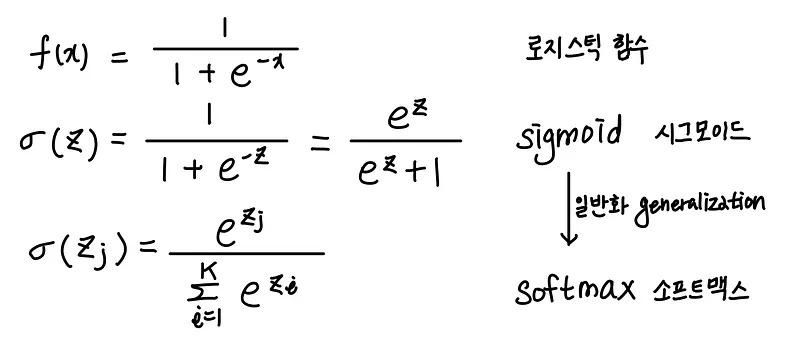

In [49]:
decision = lr.decision_function(test_scaled[:5])
print("5개의 샘플에 대한 z1 ~ z7의 값\n")
for idx, z in enumerate(decision):
    print(f'{idx}번째 샘플의 z값\n{z}\n')

5개의 샘플에 대한 z1 ~ z7의 값

0번째 샘플의 z값
[-6.50722814  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625859
 -0.62549704]

1번째 샘플의 z값
[-10.87900747   1.94410609   4.77600607  -2.42306183   2.98748716
   7.84171377  -4.24724379]

2번째 샘플의 z값
[-4.33809959 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431898
 -3.87182371]

3번째 샘플의 z값
[-0.69143994  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143404
  1.25700485]

4번째 샘플의 z값
[-6.40138612 -1.99137623  5.81526372 -0.134644    3.49905134 -0.08753485
 -0.69937385]



In [53]:
from scipy.special import softmax
print("소프트맥스 함수로 예측 확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = softmax(decision, axis=1).round(2) * 100
con = np.column_stack((sm,prd))
print(pd.DataFrame(con,columns=class_))

소프트맥스 함수로 예측 확률 구하기

  Bream Parkki Perch  Pike Roach Smelt Whitefish  예측 결과
0   0.0    1.0  84.0   0.0  13.0   1.0       0.0  Perch
1   0.0    0.0   4.0   0.0   1.0  95.0       0.0  Smelt
2   0.0    0.0   3.0  93.0   2.0   2.0       0.0   Pike
3   1.0    3.0  31.0   1.0  57.0   0.0       8.0  Roach
4   0.0    0.0  90.0   0.0   9.0   0.0       0.0  Perch
